In [60]:
#from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from sklearn import datasets
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

### Set up data

The below cell reads in the data, and defines a function which finds the min/max intervals for a given feature. This will be used later to compute the fuzzy membership function.

Index(['wine type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'value of diluted wines',
       'Proline'],
      dtype='object')


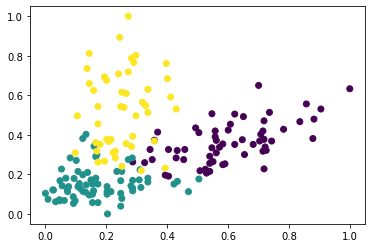

,wine type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,value of diluted wines,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [62]:
df_wine = pd.read_csv('wine_clean.csv')
print(df_wine.columns)
scaler = MinMaxScaler()
df_wine[df_wine.columns] = scaler.fit_transform(df_wine[df_wine.columns])


plt.scatter(df_wine['Proline'],df_wine['Color intensity'],c=df_wine['wine type'])
plt.show()
df_wine.head()

25.32089922839092 3.1742168603714762e-06


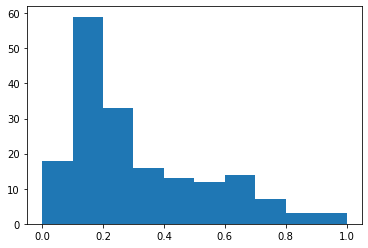

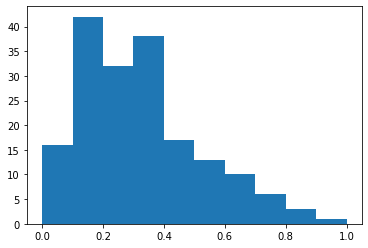

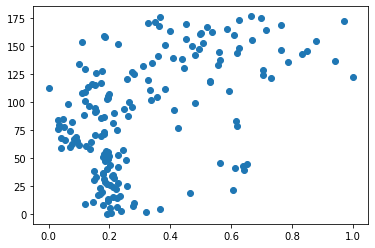

In [63]:
k2, p = stats.normaltest(df_wine['Malic acid'])
print(k2,p)
plt.hist(df_wine['Malic acid'])
plt.show()
plt.hist(df_wine['Color intensity'])
plt.show()
plt.scatter(df_wine['Malic acid'],range(len(df_wine)))
plt.show()

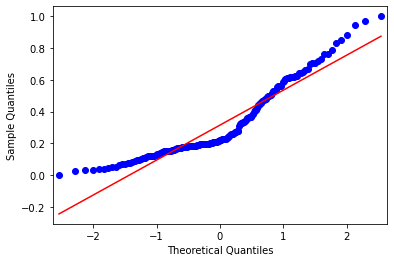

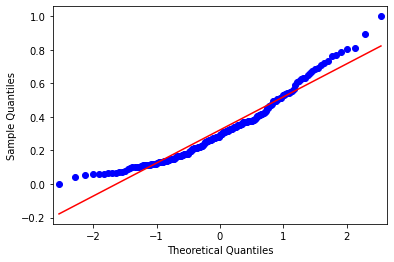

In [64]:
qqplot(df_wine['Malic acid'], line='s')
plt.show()
qqplot(df_wine['Color intensity'], line='s')
plt.show()

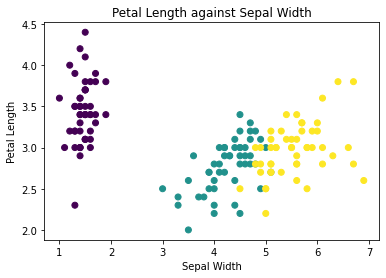

In [3]:
iris = datasets.load_iris()
#sepal length
iris_col_1 = iris.data[:,:1]
#sepal width
iris_col_2 = iris.data[:,1:2]
#petal length
iris_col_3 = iris.data[:,2:3]
#petal width
iris_col_4 = iris.data[:,3:4]

iris_list = [iris_col_1,iris_col_2,iris_col_3,iris_col_4]
plt.scatter(iris_col_3,iris_col_2,c=iris.target)
plt.title('Petal Length against Sepal Width')
plt.ylabel('Petal Length')
plt.xlabel('Sepal Width')
plt.show()

In [4]:
def get_intervals(feature_interval):
    max_interval = max(feature_interval)
    min_interval = min(feature_interval)
    interval_list = [min_interval, (max_interval + min_interval) / 2, max_interval]
    return interval_list

feature_intervals = get_intervals(df_wine['Color intensity'])
print(feature_intervals)

[1.28, 7.14, 13.0]


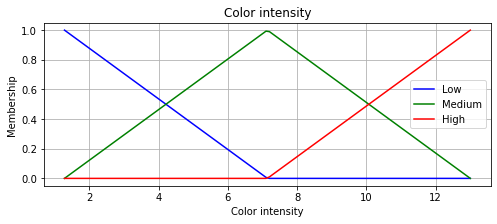

In [5]:
def get_fuzzy_boundaries(intervals,data):
    low = [min(data), min(data), intervals[1]]
    med = [min(data), intervals[1], max(data)]
    high = [intervals[1], max(data), max(data)]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, df_wine['Color intensity'])
df_wine.sort_values(['Color intensity'], inplace=True)

qual_lo = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[0])
qual_md = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[1])
qual_high = fuzz.trimf(df_wine['Color intensity'].values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(df_wine['Color intensity'].values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(df_wine['Color intensity'].values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(df_wine['Color intensity'].values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Color intensity')
ax0.legend()
ax0.grid()
plt.ylabel('Membership')
plt.xlabel('Color intensity')
plt.show()

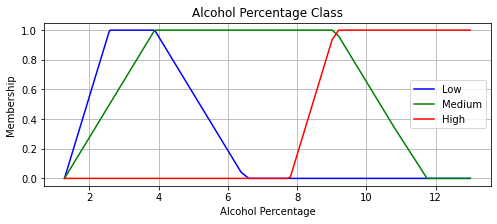

In [6]:
#Color intensity
df_wine.sort_values(['Color intensity'], inplace=True)
feature_name = df_wine['Color intensity']
feature_intervals = np.linspace(min(feature_name), max(feature_name), num=10)

def get_fuzzy_boundaries(intervals,data):
    low = [feature_intervals[0],feature_intervals[1],feature_intervals[2],feature_intervals[4]]
    med = [feature_intervals[0],feature_intervals[2],feature_intervals[6],feature_intervals[8]]
    high = [feature_intervals[5],feature_intervals[6],feature_intervals[9],feature_intervals[9]]
    return [low, med, high]

fuzzy_boundaries = get_fuzzy_boundaries(feature_intervals, feature_name)

qual_lo = fuzz.trapmf(feature_name.values, fuzzy_boundaries[0])
qual_md = fuzz.trapmf(feature_name.values, fuzzy_boundaries[1])
qual_high = fuzz.trapmf(feature_name.values, fuzzy_boundaries[2])

fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 3))

ax0.plot(feature_name.values, qual_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(feature_name.values, qual_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(feature_name.values, qual_high, 'r', linewidth=1.5, label='High')
ax0.set_title('Alcohol Percentage Class')
ax0.legend()
ax0.grid()
plt.ylabel('Membership ')
plt.xlabel('Alcohol Percentage')
plt.show()

(178, 2)
fuzzy partition coefficient:  0.9999999999861315


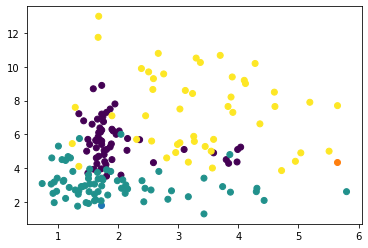

fuzzy partition coefficient:  0.9999999999698914


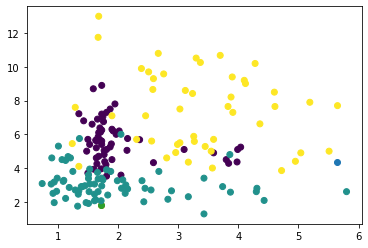

fuzzy partition coefficient:  0.9999514294392927


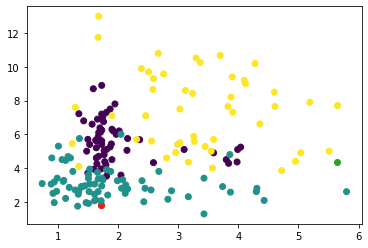

fuzzy partition coefficient:  0.9999999999904752


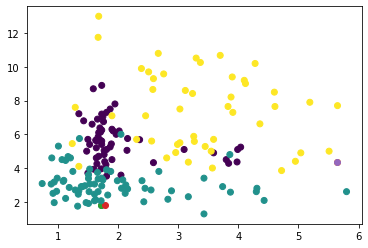

In [29]:
#chosen_columns = np.hstack((iris_col_3,iris_col_2))
print(np.shape(df_wine[['Malic acid','Color intensity']].values))
for x in range(2,6):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_wine[['Malic acid','Color intensity']].values, c = x, m = 2, 
                                                 error = 0.005, maxiter = 1000, init=None)
    print('fuzzy partition coefficient: ',fpc)
    for x in cntr:
        plt.scatter(x[0],x[1])
    plt.scatter(df_wine['Malic acid'],df_wine['Color intensity'],c=df_wine['wine type'])
    plt.show()